In [1]:
#quantum 2 qubit ripple-carry adder
#Credits IIT Roorkee Team 
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, BasicAer
import numpy as np

import matplotlib.pyplot as plt
from pprint import pprint

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
options_without_noise = {
}
options_noise = {
    'plot': False,
    "thermal_factor": 1.0,
    "decoherence_factor": 1.0,
    "depolarization_factor": 1.0,
    "bell_depolarization_factor": 1.0,
    "decay_factor": 0.99,
    "rotation_error": {'rx':[1.0, 0.0], 'ry':[1.0, 0.0], 'rz': [1.0, 0.0]},
    "tsp_model_error": [1.0, 0.0]
}

In [3]:
# The Circuit
q= QuantumRegister(7)
c = ClassicalRegister(7)
qc = QuantumCircuit(q,c)
# Preparation
qc.x(0)
qc.x(3)
qc.barrier()
# Addition
qc.cx(1,6)
qc.cx(3,6)
qc.ccx(1,3,5)
qc.barrier()
qc.ccx(0,2,4)
qc.cx(0,2)
qc.ccx(2,5,4)
qc.cx(2,5)
qc.cx(0,2)

qc.measure(q[4],c[4])
qc.measure(q[5],c[5])
qc.measure(q[6],c[6])

backend = BasicAer.get_backend('dm_simulator')

# Execution without noise
run = execute(qc,backend,**options_without_noise)
result = run.result()

#Execution with noise 
run_error = execute(qc,backend,**options_noise)
result_error = run_error.result()


# pprint(result.to_dict())
# pprint(result_error.to_dict())

# Final state (probabilities)
prob = result.results[0].data.partial_probability
prob_error = result_error.results[0].data.partial_probability
# qc.draw()

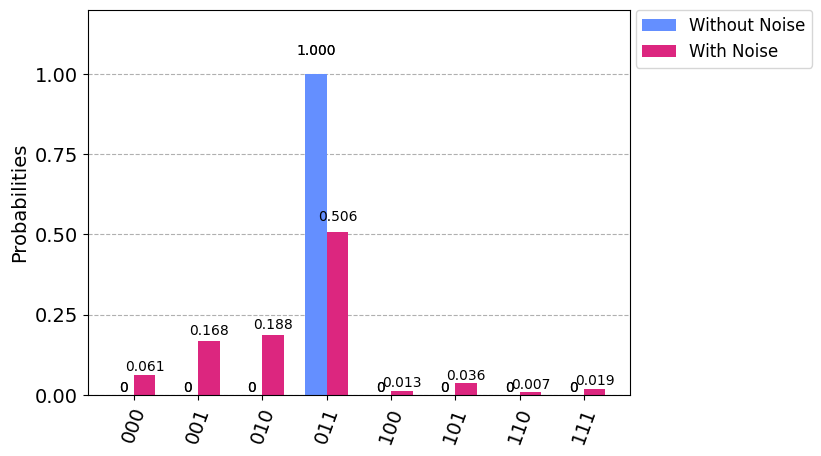

In [4]:
from qiskit.visualization import plot_histogram

plot_histogram([prob, prob_error], legend=['Without Noise', 'With Noise'])